### Dataset Overview
This dataset details basketball field goal attempts during the 2014-2015 season. Specificially, it provides information such as the player who attempted the field goal, where on the court was the field goal attempted, who was the nearest defender, how far away was the nearest defender, time on the shot clock, and much more.

The data was scraped from NBA's REST API. The dataset contains **128,069 observations across 21 columns** and can be found at the link below:

https://www.kaggle.com/dansbecker/nba-shot-logs

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
%matplotlib inline

## Read dataset in and begin investigating its properties

In [2]:
shots = pd.read_csv('shot_logs.csv')

In [3]:
shots.shape

(128069, 21)

In [4]:
shots.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [5]:
pd.options.display.max_rows = 999
shots.head(5)

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [6]:
shots.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


## Exploratory Analysis

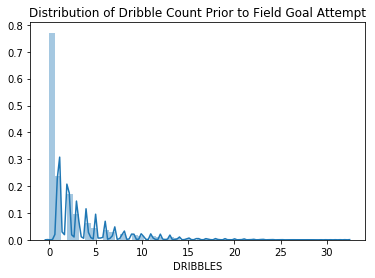

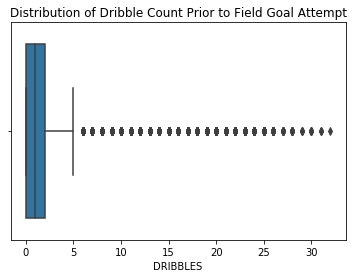

count    128069.000000
mean          2.023355
std           3.477760
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: DRIBBLES, dtype: float64


In [7]:
#Start with Dribbles 
sns.distplot(shots['DRIBBLES'])
plt.title('Distribution of Dribble Count Prior to Field Goal Attempt')
plt.show()

sns.boxplot(x=shots["DRIBBLES"])
plt.title('Distribution of Dribble Count Prior to Field Goal Attempt')
plt.show()
print(shots['DRIBBLES'].describe())

Outliers to be removed during data cleaning stage

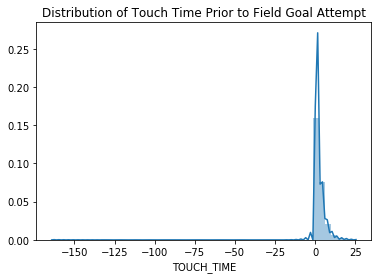

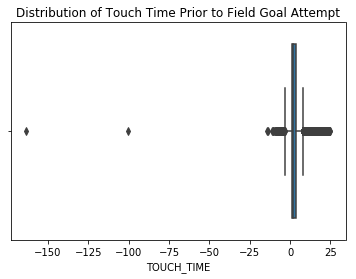

count    128069.000000
mean          2.765901
std           3.043682
min        -163.600000
25%           0.900000
50%           1.600000
75%           3.700000
max          24.900000
Name: TOUCH_TIME, dtype: float64


In [8]:
#Now, look at touch time
sns.distplot(shots['TOUCH_TIME'])
plt.title('Distribution of Touch Time Prior to Field Goal Attempt')
plt.show()

sns.boxplot(x=shots["TOUCH_TIME"])
plt.title('Distribution of Touch Time Prior to Field Goal Attempt')
plt.show()
print(shots['TOUCH_TIME'].describe())

Similar to above, outliers to be removed during data cleaning stage

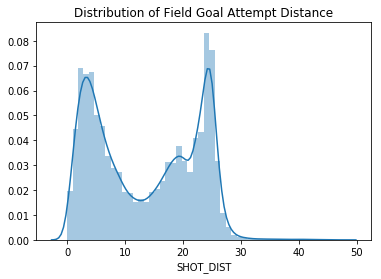

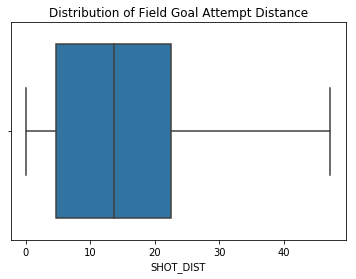

count    128069.000000
mean         13.571504
std           8.888964
min           0.000000
25%           4.700000
50%          13.700000
75%          22.500000
max          47.200000
Name: SHOT_DIST, dtype: float64


In [9]:
#Next, look at shot distance
sns.distplot(shots['SHOT_DIST'])
plt.title('Distribution of Field Goal Attempt Distance')
plt.show()

sns.boxplot(x=shots["SHOT_DIST"])
plt.title('Distribution of Field Goal Attempt Distance')
plt.show()
print(shots['SHOT_DIST'].describe())

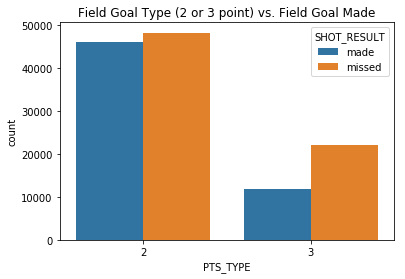

In [10]:
#Now look at shot type and shots made

sns.countplot(x='PTS_TYPE', hue='SHOT_RESULT', data=shots)
plt.title('Field Goal Type (2 or 3 point) vs. Field Goal Made')
plt.show()

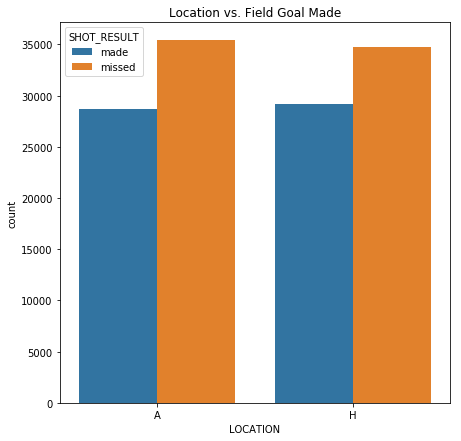

In [11]:
#Now look at home/away and shots made

plt.figure(figsize=[7,7])
sns.countplot(x='LOCATION', hue='SHOT_RESULT', data=shots)
plt.title('Location vs. Field Goal Made')
plt.show()

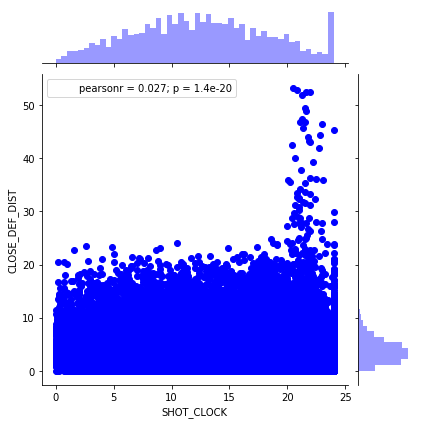

In [12]:
sns.jointplot(x=shots.SHOT_CLOCK, y=shots.CLOSE_DEF_DIST, color="b")
plt.show()

The abundance of shots with so much time left on the shot clock makes me think this represents fast break opportunities. This may be a good feature to engineer. 

## Data Cleaning

In [13]:
#Remove insignificant columns that can't be used as features

shots = shots.drop(['GAME_ID', 'MATCHUP', 'GAME_CLOCK', 'CLOSEST_DEFENDER', 'player_name', 'CLOSEST_DEFENDER_PLAYER_ID', 'FGM', 'PTS', 'player_id'], 1)
shots.head(5)

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,A,W,24,1,1,10.8,2,1.9,7.7,2,made,1.3
1,A,W,24,2,1,3.4,0,0.8,28.2,3,missed,6.1
2,A,W,24,3,1,NaN,3,2.7,10.1,2,missed,0.9
3,A,W,24,4,2,10.3,2,1.9,17.2,2,missed,3.4
4,A,W,24,5,2,10.9,2,2.7,3.7,2,missed,1.1


In [14]:
#Determine missing values across dataframe

missing_values_count = shots.isnull().sum()
print(missing_values_count)

LOCATION             0
W                    0
FINAL_MARGIN         0
SHOT_NUMBER          0
PERIOD               0
SHOT_CLOCK        5567
DRIBBLES             0
TOUCH_TIME           0
SHOT_DIST            0
PTS_TYPE             0
SHOT_RESULT          0
CLOSE_DEF_DIST       0
dtype: int64


In [15]:
#Since we have over 120k observations, I think we can go ahead and drop these observations
#instead of imputing

shots = shots.dropna()

## Feature Selection / Engineering

In [16]:
#Convert categorical data types to binary
shots['LOCATION'] = np.where((shots['LOCATION'] == 'H'), 1, 0) #Home = 1, Away = 0
shots['W'] = np.where((shots['W'] == 'W'), 1, 0) #Win = 1, Loss = 0
shots['PTS_TYPE'] = np.where((shots['PTS_TYPE'] == 3), 1, 0) #3 pointer = 1, 2 pointer = 0
shots['SHOT_RESULT'] = np.where((shots['SHOT_RESULT'] == 'made'), 1, 0) #Made = 1, Missed = 0

#Confirm this worked
shots.head(5)

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,0,1,24,1,1,10.8,2,1.9,7.7,0,1,1.3
1,0,1,24,2,1,3.4,0,0.8,28.2,1,0,6.1
3,0,1,24,4,2,10.3,2,1.9,17.2,0,0,3.4
4,0,1,24,5,2,10.9,2,2.7,3.7,0,0,1.1
5,0,1,24,6,2,9.1,2,4.4,18.4,0,0,2.6


In [17]:
#Get rid of skewness/outliers seen above (Dribbles, Touch Time)
shots['DRIBBLES'].quantile(0.95)

9.0

In [18]:
shots = shots[shots['DRIBBLES'] <= 9]

In [19]:
shots = shots[shots['TOUCH_TIME'] >= 0]

In [20]:
#Add a few new features - first, investigate closest defender distance feature
shots['CLOSE_DEF_DIST'].describe()

count    116322.000000
mean          4.155814
std           2.786902
min           0.000000
25%           2.300000
50%           3.700000
75%           5.300000
max          53.200000
Name: CLOSE_DEF_DIST, dtype: float64

In [21]:
#Create easy shot feature
shots['Open_Shot'] = np.where((shots['CLOSE_DEF_DIST'] > 3.7) & (shots['SHOT_DIST'] < 13.6), 1, 0)

In [22]:
#Investigate shot distance feature
shots['SHOT_DIST'].describe()

count    116322.000000
mean         13.481542
std           8.822219
min           0.000000
25%           4.600000
50%          13.600000
75%          22.500000
max          43.500000
Name: SHOT_DIST, dtype: float64

In [23]:
#Create difficult shot feature
shots['Difficult_Shot'] = np.where((shots['SHOT_DIST'] > 13.6) & (shots['CLOSE_DEF_DIST'] < 3.7), 1, 0)

In [24]:
#Create contested shot feature
shots['Contested_Shot'] = np.where((shots['CLOSE_DEF_DIST'] < 3.7), 1, 0)

In [25]:
#Create fast break feature
shots['Fast_Break'] = np.where((shots['SHOT_CLOCK'] >= 20) & (shots['CLOSE_DEF_DIST'] >= 20), 1, 0)

## Create Repeatable Functions for Each Model Type

In [26]:
#Establish X and Y
#Use pd.get_dummies for X because Period is categorical

X = shots.drop(['SHOT_RESULT'], 1)
X = pd.get_dummies(X)
Y = shots['SHOT_RESULT']

## Naive Bayes

In [27]:
#Create function

def NB_Model(model):
        import timeit
        start = timeit.default_timer()
        if model == 'Bernoulli':
                NB_Model = BernoulliNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Bernoulli Naive Bayes')
        
        elif model == 'Gaussian':
                NB_Model = GaussianNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Gaussian Naive Bayes')

        else:
                NB_Model = MultinomialNB()
                NB_Model.fit(X, Y)
                positive_pred = NB_Model.predict(X)
                print('\n Percentage accuracy for Multinomial Naive Bayes')
            
        print(str(NB_Model.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(NB_Model, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
        #Print time
        stop = timeit.default_timer()
        execution_time = stop - start
        print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## K-Nearest Neighbors

In [28]:
#Create function

def KNN_Model(k, weight):
    import timeit
    start = timeit.default_timer()
    KNN = KNeighborsClassifier(n_neighbors=k, weights=weight)
    KNN.fit(X, Y)
    positive_pred = KNN.predict(X)
    print('\n Percentage accuracy for K Nearest Neighbors Classifier')
    print(str(KNN.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(KNN, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Random Forest

In [29]:
#Create function

def RFC_Model(trees, criteria, num_features, depth):
    import timeit
    start = timeit.default_timer()
    rfc = ensemble.RandomForestClassifier(n_estimators=trees, criterion=criteria, max_features=num_features, max_depth=depth)
    rfc.fit(X, Y)
    positive_pred = rfc.predict(X)
    print('\n Percentage accuracy for Random Forest Classifier')
    print(str(rfc.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(rfc, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Logistic Regression

In [30]:
#Create function

def Logistic_Reg_Model(regularization, alpha):
    import timeit
    start = timeit.default_timer()
    if regularization == 'l1':
        lr_lasso = LogisticRegression(penalty=regularization, C=alpha)
        lr_lasso.fit(X, Y)
        positive_pred = lr_lasso.predict(X)
        print('\n Percentage accuracy for Lasso Logistic Regression')
        print(str(lr_lasso.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_lasso, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
    elif regularization == 'l2' and alpha == 1e9:
        lr_regular = LogisticRegression(penalty=regularization, C=alpha)
        lr_regular.fit(X, Y)
        positive_pred = lr_regular.predict(X)
        print('\n Percentage accuracy for Logistic Regression')
        print(str(lr_regular.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_regular, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
    else:
        lr_ridge = LogisticRegression(penalty=regularization, C=alpha)
        lr_ridge.fit(X, Y)
        positive_pred = lr_ridge.predict(X)
        print('\n Percentage accuracy for Ridge Logistic Regression')
        print(str(lr_ridge.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_ridge, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
     #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Support Vector Classifer

In [31]:
#Create function

def SVC_Model(c, kernel_type):
    import timeit
    start = timeit.default_timer()
    svm = SVC(C=c, kernel=kernel_type)
    svm.fit(X, Y)
    positive_pred = svm.predict(X)
    print('\n Percentage accuracy for SVM')
    print(str(svm.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(svm, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Gradient Boosting

In [32]:
#Create function

def Gradient_Boost_Model(estimators, depth, loss_function, sampling):
    import timeit
    start = timeit.default_timer()
    clf = ensemble.GradientBoostingClassifier(n_estimators=estimators, max_depth=depth, loss=loss_function, subsample=sampling)
    clf.fit(X, Y)
    positive_pred = clf.predict(X)
    print('\n Percentage accuracy for Gradient Boosting Classifier')
    print(str(clf.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(clf, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

## Run Initial Models, Default Parameters

In [33]:
#Use a sample so that our models will run without using too much computing power
shots = shots.sample(n = 10000)

#Reestablish X and Y
X = shots.drop(['SHOT_RESULT'], 1)
X = pd.get_dummies(X)
Y = shots['SHOT_RESULT']

In [34]:
#Calculate baseline accuracy for shots made

shots_made = shots['SHOT_RESULT'].sum()
print('Baseline accuracy for shots made is: ' + str(round((shots_made/shots.shape[0])*100, 2)) + '%')

Baseline accuracy for shots made is: 45.27%


In [35]:
#Run all models with default criteria, with returns in between so we can easily read

NB_Model('Bernoulli')
print('\n\n')

KNN_Model(5, 'uniform')
print('\n\n')

RFC_Model(10, 'gini', 'auto', None)
print('\n\n')

Logistic_Reg_Model('l2', 1e9)
print('\n\n')

SVC_Model(1.0, 'rbf')
print('\n\n')

Gradient_Boost_Model(100, 3, 'deviance', 1.0)


 Percentage accuracy for Bernoulli Naive Bayes
58.199999999999996%

 Cross-Validation Score
[0.55772114 0.58670665 0.602      0.5837919  0.57328664]

 Confusion Matrix


array([[3712, 1761],
       [2419, 2108]])



 Program Executed in 0.11




 Percentage accuracy for K Nearest Neighbors Classifier
72.0%

 Cross-Validation Score
[0.56871564 0.57921039 0.56       0.57578789 0.54827414]

 Confusion Matrix


array([[4285, 1188],
       [1612, 2915]])



 Program Executed in 1.18




 Percentage accuracy for Random Forest Classifier
98.22%

 Cross-Validation Score
[0.57371314 0.57871064 0.5735     0.5847924  0.58029015]

 Confusion Matrix


array([[5444,   29],
       [ 149, 4378]])



 Program Executed in 0.85




 Percentage accuracy for Logistic Regression
61.6%

 Cross-Validation Score
[0.6041979  0.62518741 0.6255     0.6098049  0.60630315]

 Confusion Matrix


array([[4227, 1246],
       [2594, 1933]])



 Program Executed in 0.49




 Percentage accuracy for SVM
84.78999999999999%

 Cross-Validation Score
[0.57921039 0.5862069  0.589      0.58929465 0.57528764]

 Confusion Matrix


array([[5059,  414],
       [1107, 3420]])



 Program Executed in 35.92




 Percentage accuracy for Gradient Boosting Classifier
64.32%

 Cross-Validation Score
[0.6081959 0.6141929 0.6145    0.6108054 0.6078039]

 Confusion Matrix


array([[4690,  783],
       [2785, 1742]])



 Program Executed in 3.48


## Run Models Again, This Time with Tuned Parameters

In [36]:
#Run Gaussian instead of Bernoulli
NB_Model('Gaussian')
print('\n\n')

#K-Nearest Neighbors (use 25 for K instead of 5 and 'distance' for weight)
KNN_Model(75, 'distance')
print('\n\n')

#Random Forest (use 50 trees, 'entropy' as the criterion)
RFC_Model(50, 'entropy', 'auto', None)
print('\n\n')

#Lasso Logistic Regression (change alpha to 0.5)
Logistic_Reg_Model('l1', 1.0)
print('\n\n')

#Ridge Logistic Regression (change alpha to 100)
Logistic_Reg_Model('l2', 100)
print('\n\n')

#Support Vector Classifier (change kernel to 'linear')
SVC_Model(1.0, 'linear')
print('\n\n')

#Gradient boost classifier (more estimators, more depth and subsampling)
Gradient_Boost_Model(300, 4, 'deviance', 0.8)


 Percentage accuracy for Gaussian Naive Bayes
57.69%

 Cross-Validation Score
[0.56971514 0.58870565 0.5785     0.56928464 0.57078539]

 Confusion Matrix


array([[5210,  263],
       [3968,  559]])



 Program Executed in 0.07




 Percentage accuracy for K Nearest Neighbors Classifier
100.0%

 Cross-Validation Score
[0.5992004  0.60869565 0.6095     0.6028014  0.6008004 ]

 Confusion Matrix


array([[5473,    0],
       [   0, 4527]])



 Program Executed in 2.68




 Percentage accuracy for Random Forest Classifier
100.0%

 Cross-Validation Score
[0.5832084  0.5862069  0.586      0.5927964  0.59129565]

 Confusion Matrix


array([[5473,    0],
       [   0, 4527]])



 Program Executed in 4.13




 Percentage accuracy for Lasso Logistic Regression
61.61%

 Cross-Validation Score
[0.60369815 0.62468766 0.627      0.61230615 0.6098049 ]

 Confusion Matrix


array([[4230, 1243],
       [2596, 1931]])



 Program Executed in 0.93




 Percentage accuracy for Ridge Logistic Regression
61.6%

 Cross-Validation Score
[0.6041979  0.62518741 0.6255     0.61030515 0.6068034 ]

 Confusion Matrix


array([[4228, 1245],
       [2595, 1932]])



 Program Executed in 0.49




 Percentage accuracy for SVM
61.33%

 Cross-Validation Score
[0.6001999  0.62468766 0.63       0.6138069  0.59529765]

 Confusion Matrix


array([[4394, 1079],
       [2788, 1739]])



 Program Executed in 174.94




 Percentage accuracy for Gradient Boosting Classifier
75.19%

 Cross-Validation Score
[0.5892054  0.5912044  0.5935     0.5857929  0.58429215]

 Confusion Matrix


array([[4868,  605],
       [1876, 2651]])



 Program Executed in 15.68


## There was a 3-4% uptick in accuracy observed by tuning models, particularly in relation to K-Nearest Neighbors.